In [735]:
import pandas as pd
import numpy as np


In [736]:
df = pd.read_csv('ufc-fighters-statistics.csv')

In [737]:
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [738]:
df.info()
# ALL VALUES PRESENT FOR FOLLOWING COLUMNS:
# name, wins, losses, draws, significant_strikes_landed_per_minute
# significant_striking_accuracy, significant_strikes_absorbed_per_minute
# significant_strike_defence, average_takedowns_landed_per_15_minutes
# takedown_accuracy, takedown_defense, average_submissions_attempted_per_15_minutes

# Missing values in following columns:
# date_of_birth, stance, reach_in_cm, weight_in_kg, height_cm, nickname

# think I'll drop date of birth as well as nickname. 
# reach, weight, height, I can get average values for the weightclass.

# stance i can't really guess what it is. If a fighter doesn't have stance data
# they are likely not very well known, I will probably just discard all data entries 
# with missing stance 
#(after a quick scroll through the data i cannot recognise any fighters without stance - they are no-names)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [739]:
# nickname is a pointless column, its getting dropped
# I'll keep name so i can come back to the fighters if theres data i need to impute
# date of birth has limited usefulness, so im cutting it out
df.drop(columns=['nickname'], inplace=True)
df.drop(columns=['date_of_birth'], inplace=True)

# dropping irrelevant fighters who's stance is unknown
df.dropna(subset=['stance'], inplace=True)
df

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,7,0,0,190.50,92.99,NaN,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
5,Gerald Strebendt,9,7,0,175.26,70.31,NaN,Orthodox,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4
7,Kenneth Seegrist,4,7,0,182.88,83.91,NaN,Orthodox,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4
8,Will Kerr,9,3,0,177.80,70.31,175.26,Orthodox,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,0,175.26,106.59,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,1,1,2,172.72,70.31,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,12,20,1,180.34,77.11,NaN,Orthodox,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,6,1,0,190.50,83.91,210.82,Southpaw,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [740]:
# At this point I realized this data also contains female fighters, and I can't really compare female and
# male fighters. Googling each fighters name and then assigning them a sex would take forever, a quicker fix is
# to get rid of all female fighters along with some male fighters in the lighter weight classes.

# Women's weight classes go up to a maximum of Featherweight, which has a max limit of 65.8 kg. I think
# if i just cut all fighters below 65.8 it should get rid of women altogether
df = df[df['weight_in_kg'] >= 65.8]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2188 non-null   object 
 1   wins                                          2188 non-null   int64  
 2   losses                                        2188 non-null   int64  
 3   draws                                         2188 non-null   int64  
 4   height_cm                                     2168 non-null   float64
 5   weight_in_kg                                  2188 non-null   float64
 6   reach_in_cm                                   1259 non-null   float64
 7   stance                                        2188 non-null   object 
 8   significant_strikes_landed_per_minute         2188 non-null   float64
 9   significant_striking_accuracy                 2188 non-null   float6

In [741]:
# Reach and height are the only columns left with some missing data, these ones 
# I can substitute averages for, but first I must create a "Weightclass" feature

weight_classes = ["lightweight", "welterweight", "middleweight", "light-heavyweight"]
for weight_class in weight_classes:
    df[weight_class] = 0

for index, row in df.iterrows():
    weight = row['weight_in_kg']
    if 65.8 < weight < 70.3:
        df.at[index, 'lightweight'] = 1
    elif 70.3 < weight < 77.1:
        df.at[index, 'welterweight'] = 1
    elif 77.1 < weight < 83.9:
        df.at[index, 'middleweight'] = 1
    elif 83.9 < weight < 93:
        df.at[index, 'light-heavyweight'] = 1

df

C:\Users\nfeda\AppData\Local\Temp\ipykernel_25548\897970042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[weight_class] = 0
C:\Users\nfeda\AppData\Local\Temp\ipykernel_25548\897970042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[weight_class] = 0
C:\Users\nfeda\AppData\Local\Temp\ipykernel_25548\897970042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,lightweight,welterweight,middleweight,light-heavyweight
0,Robert Drysdale,7,0,0,190.50,92.99,NaN,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,0,0,0,1
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0,0,0,1
5,Gerald Strebendt,9,7,0,175.26,70.31,NaN,Orthodox,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,0,1,0,0
7,Kenneth Seegrist,4,7,0,182.88,83.91,NaN,Orthodox,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4,0,0,0,1
8,Will Kerr,9,3,0,177.80,70.31,175.26,Orthodox,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,Amaury Bitetti,5,2,0,175.26,83.91,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,1
4106,John Campetella,0,1,0,175.26,106.59,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0
4107,Andre Pederneiras,1,1,2,172.72,70.31,NaN,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,1,0,0
4108,Bryson Kamaka,12,20,1,180.34,77.11,NaN,Orthodox,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0,0,0,1,0


In [742]:
lightweight_df = df[df['lightweight'] == 1]
#lightweight_df.to_csv('lightweight_df.csv')

# after analysing this, there is no reach data at all
# I found online that there is a strong enough correlation between reach and height
# for these lightweights I will simply set their reaches to be their heights or close to their heights

clean_lightweight_df = lightweight_df.dropna(subset=['height_cm'])

average_height_lightweight_cm = clean_lightweight_df['height_cm'].mean()

print("Average height (cm) of lightweight fighters (excluding null values):", average_height_lightweight_cm)

Average height (cm) of lightweight fighters (excluding null values): 173.92315789473685


In [743]:
welterweight_df = df[df['welterweight'] == 1]
#welterweight_df.to_csv('welterweight_df.csv')
clean_welterweight_df = welterweight_df.dropna(subset=['height_cm', 'reach_in_cm'])

average_height_welterweight_cm = clean_welterweight_df['height_cm'].mean()
average_reach_welterweight_in_cm = clean_welterweight_df['reach_in_cm'].mean()

print("Average height (cm) of welterweight fighters (excluding null values):", average_height_welterweight_cm)
print("Average reach (cm) of welterweight fighters (excluding null values):", average_reach_welterweight_in_cm)

Average height (cm) of welterweight fighters (excluding null values): 177.6663157894737
Average reach (cm) of welterweight fighters (excluding null values): 181.76127423822717


In [744]:
middleweight_df = df[df['middleweight'] == 1]
#middleweight_df.to_csv('middleweight_df.csv')
clean_middleweight_df = middleweight_df.dropna(subset=['height_cm', 'reach_in_cm'])

average_height_middleweight_cm = clean_middleweight_df['height_cm'].mean()
average_reach_middleweight_in_cm = clean_middleweight_df['reach_in_cm'].mean()

print("Average height (cm) of middleweight fighters (excluding null values):", average_height_middleweight_cm)
print("Average reach (cm) of middleweight fighters (excluding null values):", average_reach_middleweight_in_cm)

Average height (cm) of middleweight fighters (excluding null values): 181.57921212121212
Average reach (cm) of middleweight fighters (excluding null values): 186.75927272727273


In [745]:
lhw_df = df[df['light-heavyweight'] == 1]
#lhw_df.to_csv('lhw_df.csv')
clean_lhw_df = lhw_df.dropna(subset=['height_cm', 'reach_in_cm'])

average_height_lhw_cm = clean_lhw_df['height_cm'].mean()
average_reach_lhw_in_cm = clean_lhw_df['reach_in_cm'].mean()

print("Average height (cm) of light-heavyweight fighters (excluding null values):", average_height_lhw_cm)
print("Average reach (cm) of light-heavyweight fighters (excluding null values):", average_reach_lhw_in_cm)

Average height (cm) of light-heavyweight fighters (excluding null values): 186.08874396135266
Average reach (cm) of light-heavyweight fighters (excluding null values): 191.36507246376812


In [746]:
hw_df = df[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0)]
#hw_df.to_csv('hw_df.csv')
clean_hw_df = hw_df.dropna(subset=['height_cm', 'reach_in_cm'])

average_height_hw_cm = clean_hw_df['height_cm'].mean()
average_reach_hw_in_cm = clean_hw_df['reach_in_cm'].mean()

print("Average height (cm) of heavyweight fighters (excluding null values):", average_height_hw_cm)
print("Average reach (cm) of heavyweight fighters (excluding null values):", average_reach_hw_in_cm)

Average height (cm) of heavyweight fighters (excluding null values): 189.736339869281
Average reach (cm) of heavyweight fighters (excluding null values): 195.66300653594772


In [747]:
# Now that I know average values I can substitute in height and reach values if they are null
# For the lightweight reach values I will make them the fighters height*1.02
# It seems on average fighter reach lengths are slightly longer than their heights
# The larger the fighter, the larger the effect
# HeavyWeights reach/height =>  (195.66/189.73) - 1 = 3.125...%
# Welterweight reach/height => (181.76/177.66) - 1 = 2.307...%
# As lightweight is a step lighter than welterweight, i'll make the additional % to be 2 for convenience

df.loc[(df['lightweight'] == 1) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = df['height_cm']*1.02

df.loc[(df['welterweight'] == 1) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = average_reach_welterweight_in_cm
df.loc[(df['welterweight'] == 1) & df['height_cm'].isnull(), 'height_cm'] = average_height_welterweight_cm

df.loc[(df['middleweight'] == 1) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = average_reach_middleweight_in_cm
df.loc[(df['middleweight'] == 1) & df['height_cm'].isnull(), 'height_cm'] = average_height_middleweight_cm

df.loc[(df['light-heavyweight'] == 1) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = average_reach_lhw_in_cm
df.loc[(df['light-heavyweight'] == 1) & df['height_cm'].isnull(), 'height_cm'] = average_height_lhw_cm

df.loc[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0) & df['reach_in_cm'].isnull(), 'reach_in_cm'] = average_reach_lhw_in_cm
df.loc[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0) & df['height_cm'].isnull(), 'height_cm'] = average_height_lhw_cm


In [748]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 0 to 4109
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2188 non-null   object 
 1   wins                                          2188 non-null   int64  
 2   losses                                        2188 non-null   int64  
 3   draws                                         2188 non-null   int64  
 4   height_cm                                     2188 non-null   float64
 5   weight_in_kg                                  2188 non-null   float64
 6   reach_in_cm                                   2188 non-null   float64
 7   stance                                        2188 non-null   object 
 8   significant_strikes_landed_per_minute         2188 non-null   float64
 9   significant_striking_accuracy                 2188 non-null   float6

In [749]:
df

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,lightweight,welterweight,middleweight,light-heavyweight
0,Robert Drysdale,7,0,0,190.50,92.99,191.365072,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,0,0,0,1
4,Collin Huckbody,8,2,0,190.50,83.91,193.040000,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0,0,0,1
5,Gerald Strebendt,9,7,0,175.26,70.31,181.761274,Orthodox,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,0,1,0,0
7,Kenneth Seegrist,4,7,0,182.88,83.91,191.365072,Orthodox,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4,0,0,0,1
8,Will Kerr,9,3,0,177.80,70.31,175.260000,Orthodox,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,Amaury Bitetti,5,2,0,175.26,83.91,191.365072,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,1
4106,John Campetella,0,1,0,175.26,106.59,191.365072,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0
4107,Andre Pederneiras,1,1,2,172.72,70.31,181.761274,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,1,0,0
4108,Bryson Kamaka,12,20,1,180.34,77.11,186.759273,Orthodox,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0,0,0,1,0


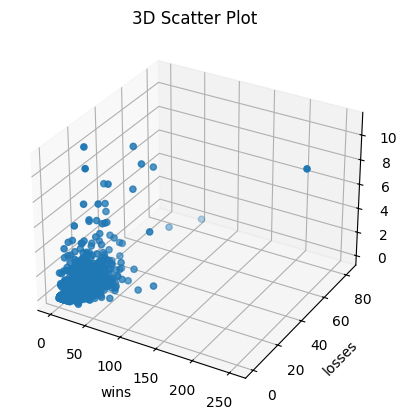

In [750]:
# I would like to perform multiple regression to figure out if any of my variables can decently explain a fighter's outcomes. Currently
# I have access to a fighter's wins, losses, and draws. Wins and Losses together can be used to describe a fighters outcomes by
# creating a Win:Loss ratio. What I would like to understand first though, is how important are draws? Can i toss it out or is it
# reasonably important and should be combined with the Win:Loss ratio in some way?

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df['wins']
y = df['losses']
z = df['draws']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('wins')
ax.set_ylabel('losses')
ax.set_zlabel('draws')
ax.set_title('3D Scatter Plot')

plt.show()

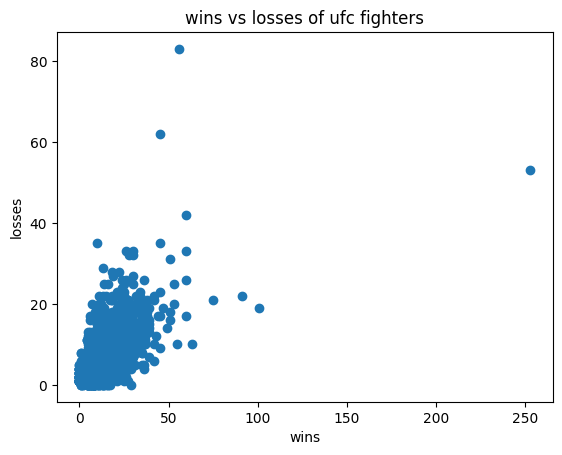

In [751]:
x = df['wins']
y = df['losses']
plt.scatter(x, y)
plt.xlabel('wins')
plt.ylabel('losses')
plt.title('wins vs losses of ufc fighters')

plt.show()

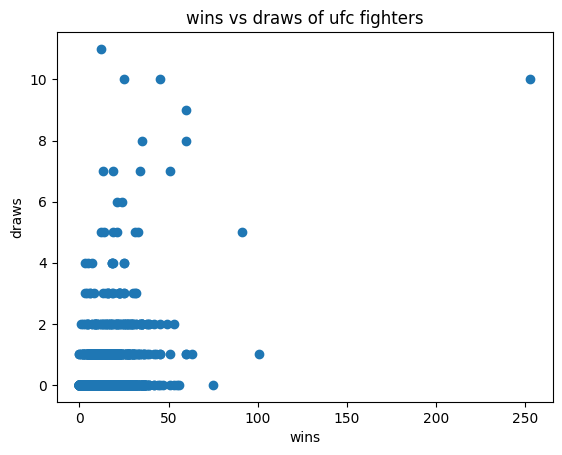

In [752]:
x = df['wins']
y = df['draws']

plt.scatter(x, y)
plt.xlabel('wins')
plt.ylabel('draws')
plt.title('wins vs draws of ufc fighters')
plt.show()

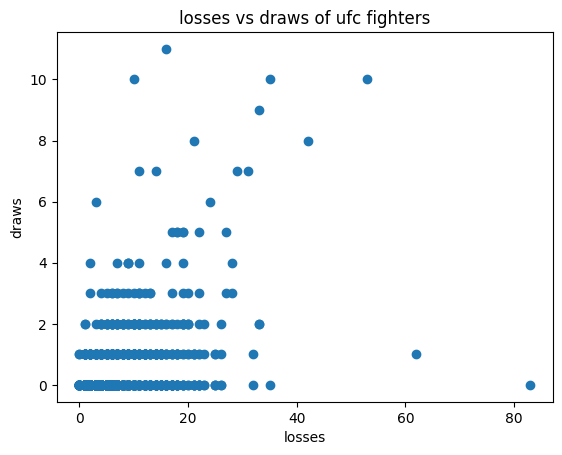

In [753]:
x = df['losses']
y = df['draws']


plt.scatter(x, y)
plt.xlabel('losses')
plt.ylabel('draws')
plt.title('losses vs draws of ufc fighters')
plt.show()

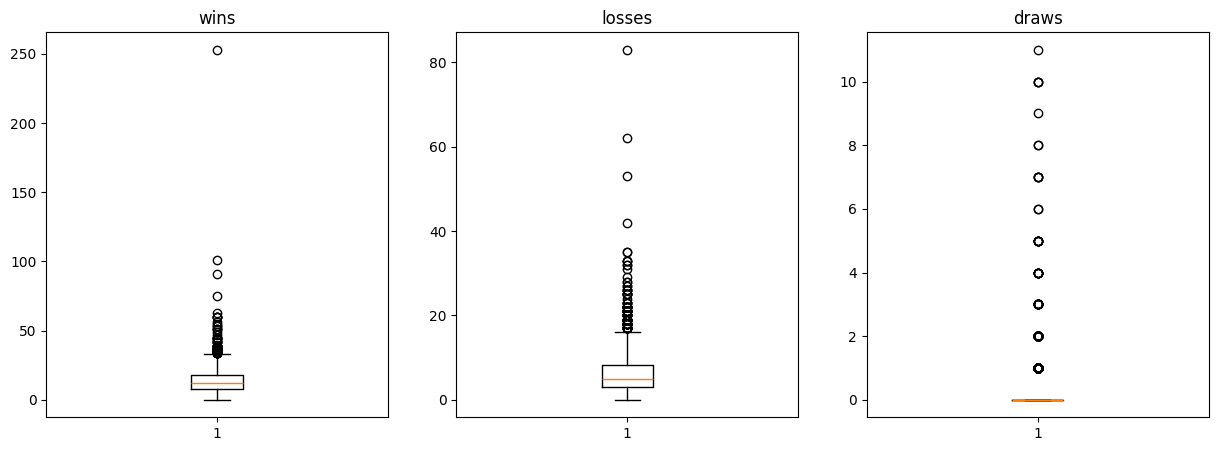

In [754]:
x = df['wins']
y = df['losses']
z = df['draws']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].boxplot(x)
axs[0].set_title('wins')

axs[1].boxplot(y)
axs[1].set_title('losses')

axs[2].boxplot(z)
axs[2].set_title('draws')

plt.show()

In [755]:
# Judging by the axes in the scatterplots, fighters tend to have more wins than draws, as well as more losses than draws. This tells us that draws happen
# but the result of a fight would usually be either a win or a loss. from box and whisker plot, it appears that any amount of draws on a fighter's
# record makes that fighter an outlier. Lastly, I believe a draw doesn't devalue a fighter the way a loss does. All fights i've seen which
# were ruled by the judges to be a draw were done so because both fighters put on a fantastic show and were on par with one another.
# The only exception i've seen to this is when fighter A is slightly better than fighter B, but since the fight happens on fighter B's turf
# The judges rule the fight as a draw rather than aqknowledging that fighter A was slightly better. my dataset doesn't capture this however.
# I think opting for a simple Win:Loss ratio would be better than mixing draws into the equation.

In [756]:
df['wins_to_losses_ratio'] = df['wins'] / df['losses']
df = df.replace([np.inf, -np.inf], np.nan)
df.drop('draws', axis=1, inplace=True)
df = df.dropna()

C:\Users\nfeda\AppData\Local\Temp\ipykernel_25548\1603762861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wins_to_losses_ratio'] = df['wins'] / df['losses']


In [757]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2138 entries, 4 to 4109
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2138 non-null   object 
 1   wins                                          2138 non-null   int64  
 2   losses                                        2138 non-null   int64  
 3   height_cm                                     2138 non-null   float64
 4   weight_in_kg                                  2138 non-null   float64
 5   reach_in_cm                                   2138 non-null   float64
 6   stance                                        2138 non-null   object 
 7   significant_strikes_landed_per_minute         2138 non-null   float64
 8   significant_striking_accuracy                 2138 non-null   float64
 9   significant_strikes_absorbed_per_minute       2138 non-null   float6

,name,wins,losses,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,lightweight,welterweight,middleweight,light-heavyweight,wins_to_losses_ratio
4,Collin Huckbody,8,2,190.50,83.91,193.040000,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,0,0,0,1,4.000000
5,Gerald Strebendt,9,7,175.26,70.31,181.761274,Orthodox,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,0,1,0,0,1.285714
7,Kenneth Seegrist,4,7,182.88,83.91,191.365072,Orthodox,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4,0,0,0,1,0.571429
8,Will Kerr,9,3,177.80,70.31,175.260000,Orthodox,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,0,1,0,0,3.000000
9,Neil Grove,12,8,198.12,120.20,191.365072,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3,0,0,0,0,1.500000


In [758]:
df.nunique()
df.reset_index(drop=True, inplace=True)

In [759]:
#Stance having 5 values is odd - need to investigate
df['stance'].unique()

# Turns out "Sideways" & "Open Stance" exist, didn't know that...
# The fact there are no recurring fighters as shown by the data having 2138 unique names for 2138 rows is good

#df.to_csv('fighters_cleaned_2.csv', index=False)

array(['Orthodox', 'Southpaw', 'Switch', 'Sideways', 'Open Stance'],
      dtype=object)

In [760]:
# heights normalised within weight class

max_height_lightweight = df[df['lightweight'] == 1]['height_cm'].max()
print(f"max_height_lightweight: {max_height_lightweight}")
df.loc[(df['lightweight'] == 1), 'height_cm'] = df['height_cm']/max_height_lightweight

max_height_welterweight = df[df['welterweight'] == 1]['height_cm'].max()
print(f"max_height_welterweight: {max_height_welterweight}")
df.loc[(df['welterweight'] == 1), 'height_cm'] = df['height_cm']/max_height_welterweight

max_height_middleweight = df[df['middleweight'] == 1]['height_cm'].max()
print(f"max_height_middleweight: {max_height_middleweight}")
df.loc[(df['middleweight'] == 1), 'height_cm'] = df['height_cm']/max_height_middleweight

max_height_light_heavyweight = df[df['light-heavyweight'] == 1]['height_cm'].max()
print(f"max_height_light_heavyweight: {max_height_light_heavyweight}")
df.loc[(df['light-heavyweight'] == 1), 'height_cm'] = df['height_cm']/max_height_light_heavyweight

max_height_heavyweight = df[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0)]['height_cm'].max()
print(f"max_height_heavyweight: {max_height_heavyweight}")
df.loc[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0), 'height_cm'] = df['height_cm']/max_height_heavyweight

max_height_lightweight: 182.88
max_height_welterweight: 193.04
max_height_middleweight: 195.58
max_height_light_heavyweight: 198.12
max_height_heavyweight: 226.06


In [761]:
# weigths normalised within weight class

max_weight_lightweight = df[df['lightweight'] == 1]['weight_in_kg'].max()
print(f"max_weight_lightweight: {max_weight_lightweight}")
df.loc[(df['lightweight'] == 1), 'weight_in_kg'] = df['weight_in_kg']/max_weight_lightweight

max_weight_welterweight = df[df['welterweight'] == 1]['weight_in_kg'].max()
print(f"max_weight_welterweight: {max_weight_welterweight}")
df.loc[(df['welterweight'] == 1), 'weight_in_kg'] = df['weight_in_kg']/max_weight_welterweight

max_weight_middleweight = df[df['middleweight'] == 1]['weight_in_kg'].max()
print(f"max_weight_middleweight: {max_weight_middleweight}")
df.loc[(df['middleweight'] == 1), 'weight_in_kg'] = df['weight_in_kg']/max_weight_middleweight

max_weight_light_heavyweight = df[df['light-heavyweight'] == 1]['weight_in_kg'].max()
print(f"max_weight_light_heavyweight: {max_weight_light_heavyweight}")
df.loc[(df['light-heavyweight'] == 1), 'weight_in_kg'] = df['weight_in_kg']/max_weight_light_heavyweight

max_weight_heavyweight = df[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0)]['weight_in_kg'].max()
print(f"max_weight_heavyweight: {max_weight_heavyweight}")
df.loc[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0), 'weight_in_kg'] = df['weight_in_kg']/max_weight_heavyweight


max_weight_lightweight: 69.85
max_weight_welterweight: 76.2
max_weight_middleweight: 83.01
max_weight_light_heavyweight: 92.99
max_weight_heavyweight: 349.27


In [762]:
# reach_in_cm normalised within weight class

max_reach_lightweight = df[df['lightweight'] == 1]['reach_in_cm'].max()
print(f"max_reach_lightweight: {max_reach_lightweight}")
df.loc[(df['lightweight'] == 1), 'reach_in_cm'] = df['reach_in_cm']/max_reach_lightweight

max_reach_welterweight = df[df['welterweight'] == 1]['reach_in_cm'].max()
print(f"max_reach_welterweight: {max_reach_welterweight}")
df.loc[(df['welterweight'] == 1), 'reach_in_cm'] = df['reach_in_cm']/max_reach_welterweight

max_reach_middleweight = df[df['middleweight'] == 1]['reach_in_cm'].max()
print(f"max_reach_middleweight: {max_reach_middleweight}")
df.loc[(df['middleweight'] == 1), 'reach_in_cm'] = df['reach_in_cm']/max_reach_middleweight

max_reach_light_heavyweight = df[df['light-heavyweight'] == 1]['reach_in_cm'].max()
print(f"max_reach_light_heavyweight: {max_reach_light_heavyweight}")
df.loc[(df['light-heavyweight'] == 1), 'reach_in_cm'] = df['reach_in_cm']/max_reach_light_heavyweight

max_reach_heavyweight = df[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0)]['reach_in_cm'].max()
print(f"max_reach_heavyweight: {max_reach_heavyweight}")
df.loc[(df['light-heavyweight'] == 0) & (df['middleweight'] == 0) & (df['welterweight'] == 0) & (df['lightweight'] == 0), 'reach_in_cm'] = df['reach_in_cm']/max_reach_heavyweight


max_reach_lightweight: 186.5376
max_reach_welterweight: 203.2
max_reach_middleweight: 205.74
max_reach_light_heavyweight: 210.82
max_reach_heavyweight: 213.36


In [763]:
columns_to_exclude = ['name', 'stance']
columns_for_heatmap = df.drop(columns=columns_to_exclude)
correlation_matrix = columns_for_heatmap.corr()
print(correlation_matrix)

                                                  wins    losses  height_cm  \
wins                                          1.000000  0.643337   0.052145   
losses                                        0.643337  1.000000  -0.037183   
height_cm                                     0.052145 -0.037183   1.000000   
weight_in_kg                                  0.079091  0.020807   0.786029   
reach_in_cm                                  -0.009989 -0.027857   0.286846   
significant_strikes_landed_per_minute         0.080974 -0.108824   0.218876   
significant_striking_accuracy                 0.145938  0.009748   0.181581   
significant_strikes_absorbed_per_minute      -0.071595 -0.075863   0.039838   
significant_strike_defence                    0.202009  0.068508   0.210004   
average_takedowns_landed_per_15_minutes       0.049761 -0.044162   0.037282   
takedown_accuracy                             0.166064  0.085896   0.090537   
takedown_defense                              0.1936

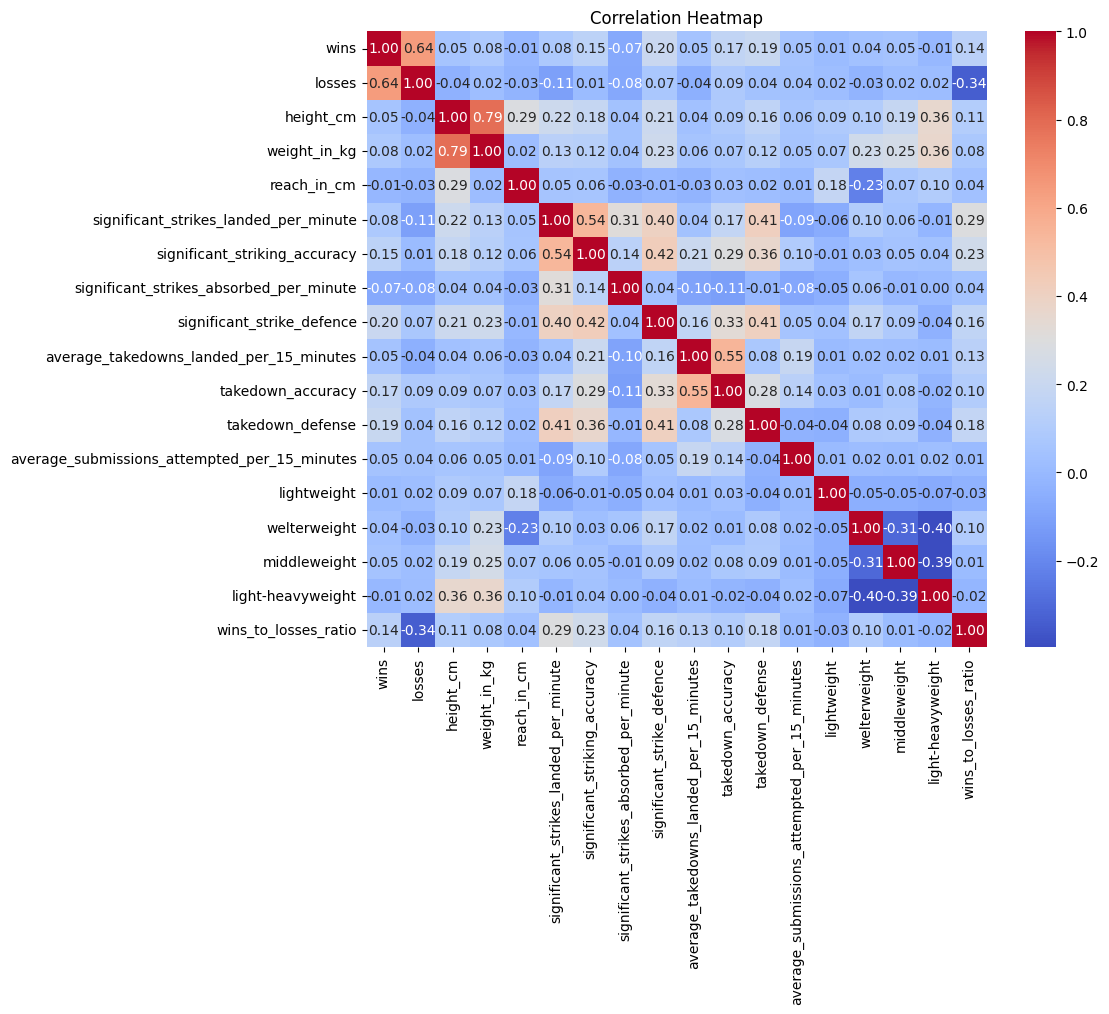

In [764]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [765]:
# theory time

# There are no "great" correlations that wins_to_losses_ratio has with other variables, but, there are some weak correlations that seem interesting
# 0.29 correlation with significant_strikes_landed_per_minute implies the more good strikes you land the greater your W/L ratio is likely to be
# 0.23 correlation with significant_striking_accuracy makes sense, the more accurate the strikes are the more likely you are to win
# 0.18 correlation with takedown defense implies the better you are at defending takedowns the likelier you are to win
# 0.16 correlation with significant_strike_defense makes sense, getting hit can lose you the fight


# Other interesting correlations to note

# 0.19 correlation between avg_submissions_attempted & avg_takedowns_landed makes sense as the more you attempt the more will succeed
# 0.14 correlation between avg_submissions_attempted & takedown_accuracy may imply fighter who are better grapplers, grapple more

# 0.41 correlation between takedown_defense and significant_strikes_landed may imply a good offense is a good defense
# 0.36 correlation between takedown_defense and significant_striking_accuracy makes sense

# 0.41 correlation between takedown_defense and significant_strike_defence may imply that a fighter good at one type of defence is likely
# to be good at another type of defence

# 0.28 correlation between takedown_defense and takedown_accuracy may imply somebody good at takedowns is likely to be good at defending them

# 0.55 correlation between takedown_accuracy and average_takedowns_landed makes a lot of sense, the better you are at them, the more youll land

# 0.33 cor between significant_strike_defense and takedown_accuracy may imply fighters grapple to defend against strikes

# 0.29 cor between significant_strike_accuracy and takedown accuracy implies a fighter good in one, is likely to be good in the other
# 0.28 cor between significant_strike_accuracy and takedown defense implies a fighter good in one, is likely to be good in the other

# 0.19 cor between avg_submissions_attempted and avg_takedowns_landed makes perfect sense, if you land a takedown you like to submit the opponent
# 0.21 cor avg_takedowns_landed and significant_striking_accuracy implies a fighter good in one, is likely to be good in the other

# 0.40 cor between significant_strike_defense and significant_strikes_landed means the more you land, the better you defend
# 0.42 cor between significant_strike_defense and significant_strikes_accuracy means the same as above really
# 0.42 cor between significant_strike_defense and takedown_defence means the same as above really 

# 0.31 cor between significant_strikes_absorbed and landed implies the more you dish out, the more return fire you take

# 0.54 cor between significant_strikes_accuracy and significant_strikes_landed makes sense

# 0.18 cor between significant_striking_accuracy and height, probably means the taller fighters size plays to their advantage
# 0.22 cor between significant_strikes_landed and height, means same as above

In [766]:
# i think all of the below are on a 0 to 100 scale, in which case they should probably be rescaled down
print(df['takedown_defense'].max())
print(df['takedown_accuracy'].max())
print(df['significant_strike_defence'].max())
print(df['significant_striking_accuracy'].max())

df['takedown_defense'] = df['takedown_defense'] / 100
df['takedown_accuracy'] = df['takedown_accuracy'] / 100
df['significant_strike_defence'] = df['significant_strike_defence'] / 100
df['significant_striking_accuracy'] = df['significant_striking_accuracy'] / 100

df

100.0
100.0
100.0
100.0


,name,wins,losses,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,lightweight,welterweight,middleweight,light-heavyweight,wins_to_losses_ratio
0,Collin Huckbody,8,2,0.961538,0.902355,0.915663,Orthodox,2.05,0.60,2.73,0.42,10.23,1.0,0.0,20.4,0,0,0,1,4.000000
1,Gerald Strebendt,9,7,0.907895,0.922703,0.894494,Orthodox,0.00,0.00,4.00,0.38,0.00,0.0,0.0,16.4,0,1,0,0,1.285714
2,Kenneth Seegrist,4,7,0.923077,0.902355,0.907718,Orthodox,3.21,0.66,1.28,0.00,0.00,0.0,0.4,14.4,0,0,0,1,0.571429
3,Will Kerr,9,3,0.921053,0.922703,0.862500,Orthodox,1.91,0.42,6.22,0.33,0.00,0.0,0.0,14.3,0,1,0,0,3.000000
4,Neil Grove,12,8,0.876404,0.344146,0.896912,Orthodox,0.00,0.00,0.00,0.00,0.00,0.0,1.0,14.3,0,0,0,0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,Amaury Bitetti,5,2,0.884615,0.902355,0.907718,Orthodox,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,1,2.500000
2134,John Campetella,0,1,0.775281,0.305179,0.896912,Orthodox,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0.000000
2135,Andre Pederneiras,1,1,0.894737,0.922703,0.894494,Orthodox,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,1,0,0,1.000000
2136,Bryson Kamaka,12,20,0.922078,0.928924,0.907744,Orthodox,9.47,0.60,12.63,0.00,0.00,0.0,1.0,0.0,0,0,1,0,0.600000


                                                  wins    losses  height_cm  \
wins                                          1.000000  0.643337   0.052145   
losses                                        0.643337  1.000000  -0.037183   
height_cm                                     0.052145 -0.037183   1.000000   
weight_in_kg                                  0.079091  0.020807   0.786029   
reach_in_cm                                  -0.009989 -0.027857   0.286846   
significant_strikes_landed_per_minute         0.080974 -0.108824   0.218876   
significant_striking_accuracy                 0.145938  0.009748   0.181581   
significant_strikes_absorbed_per_minute      -0.071595 -0.075863   0.039838   
significant_strike_defence                    0.202009  0.068508   0.210004   
average_takedowns_landed_per_15_minutes       0.049761 -0.044162   0.037282   
takedown_accuracy                             0.166064  0.085896   0.090537   
takedown_defense                              0.1936

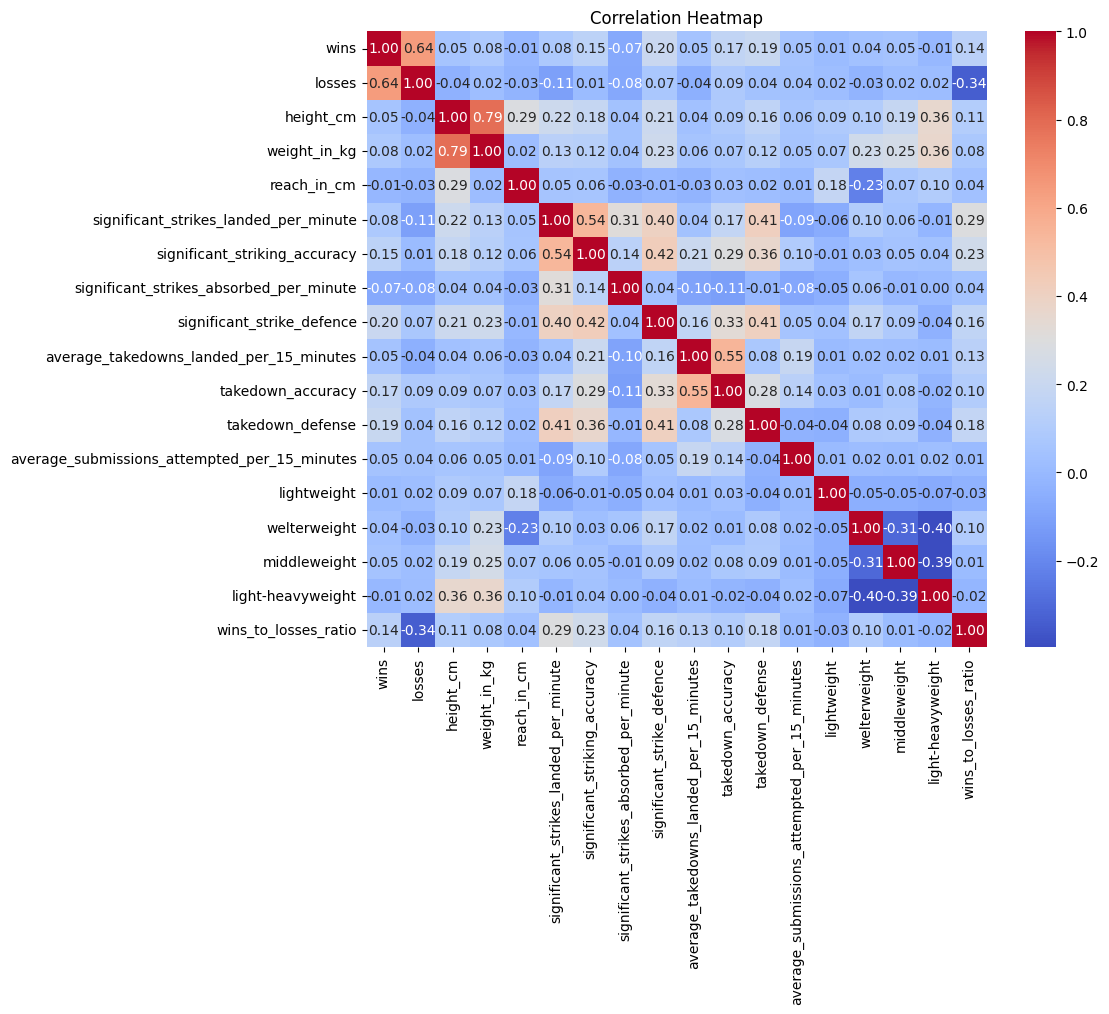

In [767]:
import seaborn as sns

columns_to_exclude = ['name', 'stance']
columns_for_heatmap = df.drop(columns=columns_to_exclude)
correlation_matrix = columns_for_heatmap.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [768]:
# I think now is a good point to start multiple regression

# My dependent variable is: wins_to_losses_ratio

# The independent variables are:
# height_cm
# Weight_in_kg
# significant_strikes_landed_per_minute
# significant_striking_accuracy
# significant_strike_defence
# average_takedowns_landed_per_15_minutes
# takedown_accuracy
# takedown_defense

# I think using either wins or losses is cheating as those 2 numbers are used to generate the independent variable
# weightclasses are also not useful here

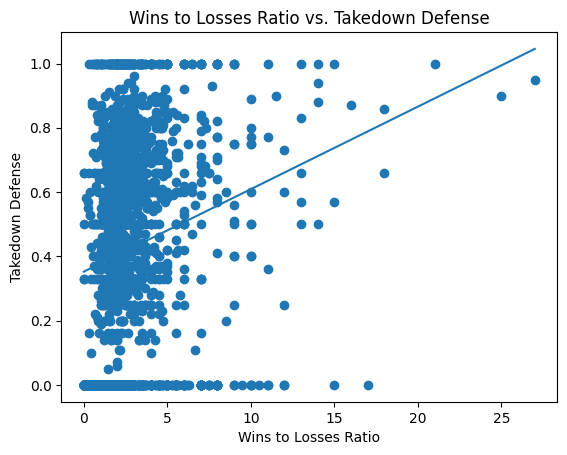

In [769]:
plt.scatter(df['wins_to_losses_ratio'], df['takedown_defense'])
poly_fit = np.polyfit(df['wins_to_losses_ratio'], df['takedown_defense'], 1)
plt.plot(np.unique(df['wins_to_losses_ratio']), np.poly1d(poly_fit)(np.unique(df['wins_to_losses_ratio'])))

plt.title("Wins to Losses Ratio vs. Takedown Defense")
plt.xlabel("Wins to Losses Ratio")
plt.ylabel("Takedown Defense")
plt.show()

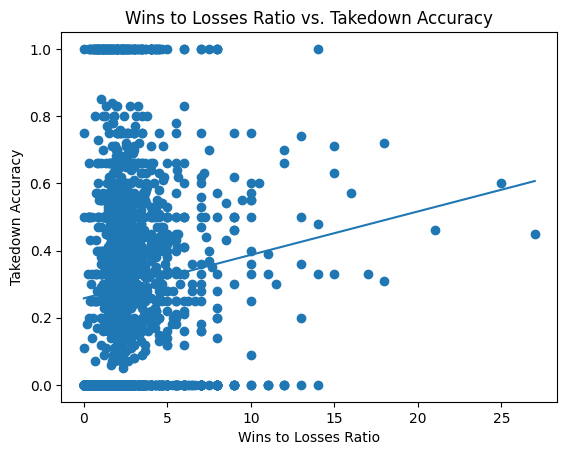

In [770]:
# The above is honestly kinda crap
# There is just too many fighters with low W/L ratios

plt.scatter(df['wins_to_losses_ratio'], df['takedown_accuracy'])
poly_fit = np.polyfit(df['wins_to_losses_ratio'], df['takedown_accuracy'], 1)
plt.plot(np.unique(df['wins_to_losses_ratio']), np.poly1d(poly_fit)(np.unique(df['wins_to_losses_ratio'])))

plt.title("Wins to Losses Ratio vs. Takedown Accuracy")
plt.xlabel("Wins to Losses Ratio")
plt.ylabel("Takedown Accuracy")
plt.show()

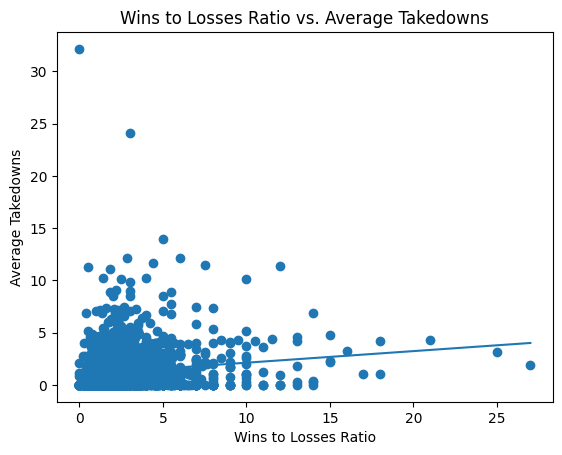

In [771]:
# The above is probably unuseable at all

plt.scatter(df['wins_to_losses_ratio'], df['average_takedowns_landed_per_15_minutes'])
poly_fit = np.polyfit(df['wins_to_losses_ratio'], df['average_takedowns_landed_per_15_minutes'], 1)
plt.plot(np.unique(df['wins_to_losses_ratio']), np.poly1d(poly_fit)(np.unique(df['wins_to_losses_ratio'])))

plt.title("Wins to Losses Ratio vs. Average Takedowns")
plt.xlabel("Wins to Losses Ratio")
plt.ylabel("Average Takedowns")
plt.show()

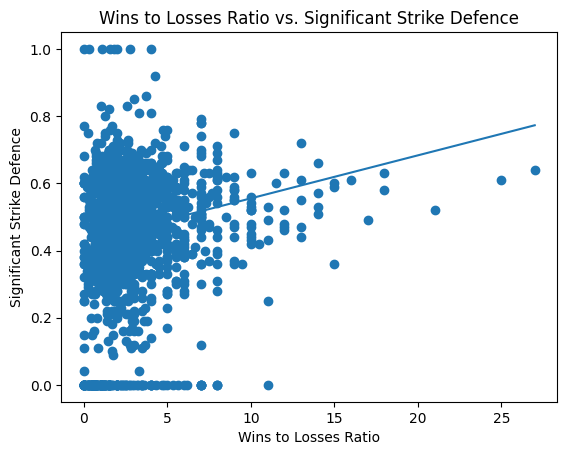

In [772]:
# Doesn't look super useful or even linear

plt.scatter(df['wins_to_losses_ratio'], df['significant_strike_defence'])
poly_fit = np.polyfit(df['wins_to_losses_ratio'], df['significant_strike_defence'], 1)
plt.plot(np.unique(df['wins_to_losses_ratio']), np.poly1d(poly_fit)(np.unique(df['wins_to_losses_ratio'])))

plt.title("Wins to Losses Ratio vs. Significant Strike Defence")
plt.xlabel("Wins to Losses Ratio")
plt.ylabel("Significant Strike Defence")
plt.show()

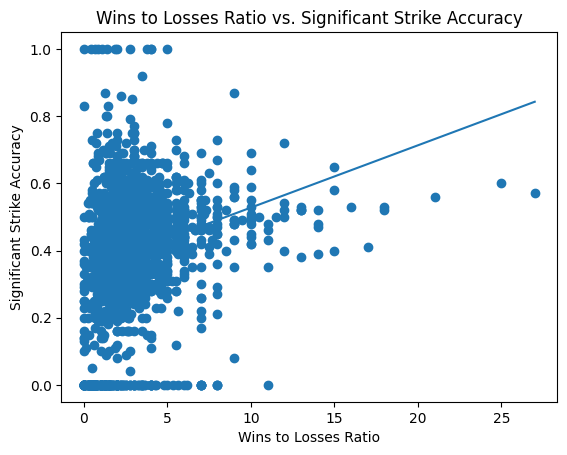

In [773]:
# there may be some limited use with this, although not perfect
# from 0 to about 0.6 the increase of one kinda also goes with the increase of the other
# what could be throwing this off above 0.6 is fighters with limited experience

plt.scatter(df['wins_to_losses_ratio'], df['significant_striking_accuracy'])
poly_fit = np.polyfit(df['wins_to_losses_ratio'], df['significant_striking_accuracy'], 1)
plt.plot(np.unique(df['wins_to_losses_ratio']), np.poly1d(poly_fit)(np.unique(df['wins_to_losses_ratio'])))

plt.title("Wins to Losses Ratio vs. Significant Strike Accuracy")
plt.xlabel("Wins to Losses Ratio")
plt.ylabel("Significant Strike Accuracy")
plt.show()

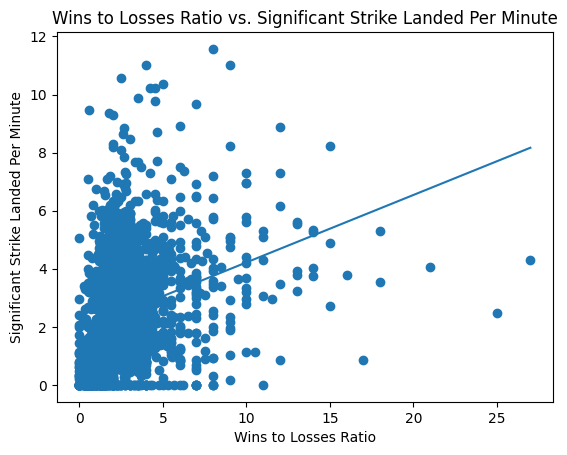

In [774]:
plt.scatter(df['wins_to_losses_ratio'], df['significant_strikes_landed_per_minute'])
poly_fit = np.polyfit(df['wins_to_losses_ratio'], df['significant_strikes_landed_per_minute'], 1)
plt.plot(np.unique(df['wins_to_losses_ratio']), np.poly1d(poly_fit)(np.unique(df['wins_to_losses_ratio'])))

plt.title("Wins to Losses Ratio vs. Significant Strike Landed Per Minute")
plt.xlabel("Wins to Losses Ratio")
plt.ylabel("Significant Strike Landed Per Minute")
plt.show()

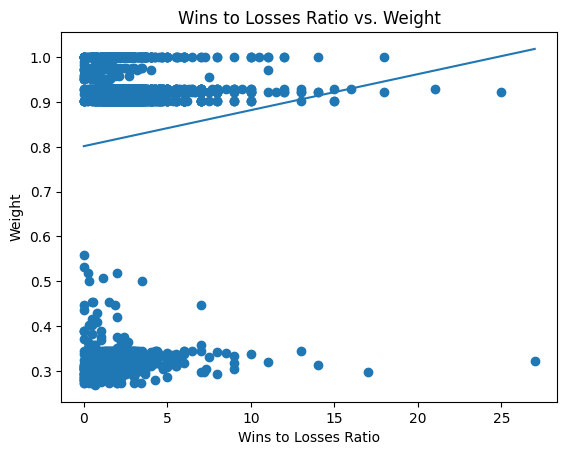

In [775]:
# This is the best graph of them all but still kinda crap

plt.scatter(df['wins_to_losses_ratio'], df['weight_in_kg'])
poly_fit = np.polyfit(df['wins_to_losses_ratio'], df['weight_in_kg'], 1)
plt.plot(np.unique(df['wins_to_losses_ratio']), np.poly1d(poly_fit)(np.unique(df['wins_to_losses_ratio'])))

plt.title("Wins to Losses Ratio vs. Weight")
plt.xlabel("Wins to Losses Ratio")
plt.ylabel("Weight")
plt.show()

In [776]:
# This looks odd... as if there are 2 clusters, and being part of
# the top cluster means there is a greater chance to have a good W/L ratio
# This may not be great for regression but may be good for the index...

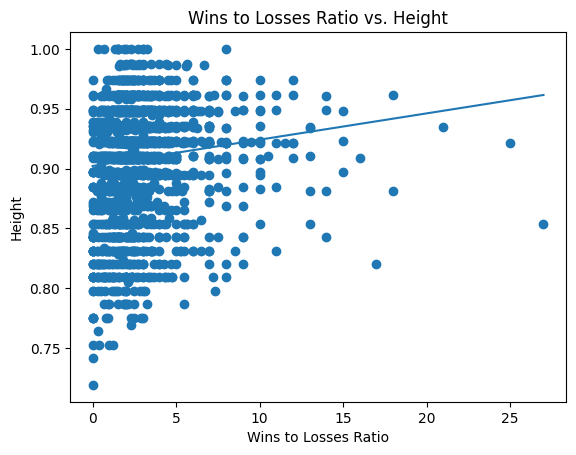

In [777]:
plt.scatter(df['wins_to_losses_ratio'], df['height_cm'])
poly_fit = np.polyfit(df['wins_to_losses_ratio'], df['height_cm'], 1)
plt.plot(np.unique(df['wins_to_losses_ratio']), np.poly1d(poly_fit)(np.unique(df['wins_to_losses_ratio'])))

plt.title("Wins to Losses Ratio vs. Height")
plt.xlabel("Wins to Losses Ratio")
plt.ylabel("Height")
plt.show()

In [778]:
# most fighters are tall in their weightclasses

In [779]:
#Scatterplot summary => All of the graphs are bad

# I will not do IV to IV graphs, that'll take a lot of time, Instead let's look
# at correlation numbers from the heatmap:

# significant_strikes_landed_per_minute v significant_striking_accuracy = 0.54 (I think multicolinearity is present)
# So significant_striking_accuracy is getting axed of these 2 as it correlates less to wins_to_losses_ratio

# height and weight have a correlation of 0.79 therefore there is multicolinearity here, I will axe weight from
# this multiregression as height correlates to wins_to_losses_ratio more.

# significant_strikes_landed_per_minute v significant_striking_defense = 0.40, some multicolinearity may be present 
# but it's not clear cut, so I think i will keep significant_striking_defense

# significant_strikes_landed_per_minute v takedown_defense = 0.41, some multicolinearity may be present 
# but it's not clear cut, so I think i will keep significant_striking_defense

# significant_striking_defense v takedown_defense = 0.41, there is potentially multicolinearity but I think
# from anecdotal experience watching fights, some fighters are really good a defending strikes, while others
# are good at defending takedowns, I dont think one really predicts the other, its moreso if a fighter
# is at the top of their weightclass, chances are they are good at both. 

# significant_strikes_landed_per_minute v significant_striking_accuracy = 0.54 (I think multicolinearity is present)
# So significant_striking_accuracy is getting axed of these 2 as it correlates less to wins_to_losses_ratio

# average_takedowns_landed_per_15_minutes v takedown_accuracy = 0.55 (I think multicolinearity is present)
# So takedown_accuracy is getting axed of these 2 as it correlates less to wins_to_losses_ratio



# So, after looking at relationships between independent variables, the following are the ones I will
# keep and try out in the multi regression model:
# height_cm
# significant_strikes_landed_per_minute
# significant_strike_defence
# average_takedowns_landed_per_15_minutes
# takedown_defense

In [780]:
# Simple linear regressions

import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

indep = sm.add_constant(df['height_cm'])
dep = df['wins_to_losses_ratio']

model = sm.OLS(dep, indep)
result = model.fit()
print(result.summary())
print(result.scale**0.5)
print(result.ssr)
#pretty weak explanatory power as shown by the R-squared

                             OLS Regression Results                             
Dep. Variable:     wins_to_losses_ratio   R-squared:                       0.012
Model:                              OLS   Adj. R-squared:                  0.012
Method:                   Least Squares   F-statistic:                     26.08
Date:                  Sun, 05 May 2024   Prob (F-statistic):           3.57e-07
Time:                          21:35:44   Log-Likelihood:                -4776.9
No. Observations:                  2138   AIC:                             9558.
Df Residuals:                      2136   BIC:                             9569.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1915      0.977

In [781]:
indep = sm.add_constant(df['significant_strikes_landed_per_minute'])
dep = df['wins_to_losses_ratio']

model = sm.OLS(dep, indep)
result = model.fit()
print(result.summary())
print(result.scale**0.5)
print(result.ssr)
#much greater explanatory power, but still not great at only about 8.5%

                             OLS Regression Results                             
Dep. Variable:     wins_to_losses_ratio   R-squared:                       0.085
Model:                              OLS   Adj. R-squared:                  0.084
Method:                   Least Squares   F-statistic:                     198.2
Date:                  Sun, 05 May 2024   Prob (F-statistic):           4.08e-43
Time:                          21:35:44   Log-Likelihood:                -4695.0
No. Observations:                  2138   AIC:                             9394.
Df Residuals:                      2136   BIC:                             9405.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [782]:
indep = sm.add_constant(df['significant_strike_defence'])
dep = df['wins_to_losses_ratio']

model = sm.OLS(dep, indep)
result = model.fit()
print(result.summary())
print(result.scale**0.5)
print(result.ssr)

#Very low explanatory power of only 2.5%

                             OLS Regression Results                             
Dep. Variable:     wins_to_losses_ratio   R-squared:                       0.026
Model:                              OLS   Adj. R-squared:                  0.025
Method:                   Least Squares   F-statistic:                     56.51
Date:                  Sun, 05 May 2024   Prob (F-statistic):           8.16e-14
Time:                          21:35:44   Log-Likelihood:                -4762.0
No. Observations:                  2138   AIC:                             9528.
Df Residuals:                      2136   BIC:                             9539.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [783]:
indep = sm.add_constant(df['average_takedowns_landed_per_15_minutes'])
dep = df['wins_to_losses_ratio']

model = sm.OLS(dep, indep)
result = model.fit()
print(result.summary())
print(result.scale**0.5)
print(result.ssr)

# Very low explanatory power of 1.7%

                             OLS Regression Results                             
Dep. Variable:     wins_to_losses_ratio   R-squared:                       0.018
Model:                              OLS   Adj. R-squared:                  0.017
Method:                   Least Squares   F-statistic:                     39.04
Date:                  Sun, 05 May 2024   Prob (F-statistic):           5.00e-10
Time:                          21:35:44   Log-Likelihood:                -4770.5
No. Observations:                  2138   AIC:                             9545.
Df Residuals:                      2136   BIC:                             9556.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [784]:
indep = sm.add_constant(df['takedown_defense'])
dep = df['wins_to_losses_ratio']

model = sm.OLS(dep, indep)
result = model.fit()
print(result.summary())
print(result.scale**0.5)
print(result.ssr)

# Low explanatory power of 3.1%

                             OLS Regression Results                             
Dep. Variable:     wins_to_losses_ratio   R-squared:                       0.031
Model:                              OLS   Adj. R-squared:                  0.031
Method:                   Least Squares   F-statistic:                     68.34
Date:                  Sun, 05 May 2024   Prob (F-statistic):           2.39e-16
Time:                          21:35:44   Log-Likelihood:                -4756.2
No. Observations:                  2138   AIC:                             9516.
Df Residuals:                      2136   BIC:                             9528.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               

In [785]:
# I will use forward selection, the first thing in my multiregression model will be:
# significant_strikes_landed_per_minute as it has the highest f-test

# The next greatest F-test is for takedown_defence so that is going into the model

indep = list(zip(df['significant_strikes_landed_per_minute'], df['takedown_defense']))
dep = df['wins_to_losses_ratio']

indep = sm.add_constant(indep)

model = sm.OLS(dep, indep)
result = model.fit()
print(result.summary())
print(result.scale**0.5)
print(result.ssr)

# sse down to 10073 from 10114

                             OLS Regression Results                             
Dep. Variable:     wins_to_losses_ratio   R-squared:                       0.089
Model:                              OLS   Adj. R-squared:                  0.088
Method:                   Least Squares   F-statistic:                     103.9
Date:                  Sun, 05 May 2024   Prob (F-statistic):           8.92e-44
Time:                          21:35:44   Log-Likelihood:                -4690.6
No. Observations:                  2138   AIC:                             9387.
Df Residuals:                      2135   BIC:                             9404.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7553      0.089

In [786]:
#significant_strike_defence

# The next variable I will add to my model is significant_strike_defence as it has the highest F-test
# of the remaining variables. AIC and BIC are less though, I think ill stick to this model.

indep = list(zip(df['significant_strikes_landed_per_minute'], df['takedown_defense'], df['significant_strike_defence']))
dep = df['wins_to_losses_ratio']

indep = sm.add_constant(indep)

model = sm.OLS(dep, indep)
result = model.fit()
print(result.summary())
print(result.scale**0.5)
print(result.ssr)

# sse down to 10062 from 10073, its also looking like the gains are diminishing, the F-test got worse

                             OLS Regression Results                             
Dep. Variable:     wins_to_losses_ratio   R-squared:                       0.090
Model:                              OLS   Adj. R-squared:                  0.088
Method:                   Least Squares   F-statistic:                     70.04
Date:                  Sun, 05 May 2024   Prob (F-statistic):           3.38e-43
Time:                          21:35:44   Log-Likelihood:                -4689.5
No. Observations:                  2138   AIC:                             9387.
Df Residuals:                      2134   BIC:                             9410.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6120      0.130

In [787]:
# I think the 3 variables in the above model would work nicely together as my first sub-indicator.
# Weighting would be as follows: 
# 1) significant_strikes_landed_per_minute - the biggest weight since it improved the regression model the most
# 2) takedown_defense - this will get a lesser weight as it also improved the model but not nearly as much
# 3) significant_strike_defence - this will get the least weight as it improved the model the least

# For my second indicator I will use:
# 1) Weight - because there clearly appears to be 2 clusters, and the cluster of
# fighters who are on the heavier end of their weightclass appear to do slightly
# better when it comes to the W/L ratio
#
# 2) Height - From looking at the scatterplot between height and Wins_to_losses_ratio, it sort of resembles a 
# distribution, fighters with the best W/L ratios are between about 82.5 and 97.5 of their respective weightclass max height,
# the tallest and shortest don't look as though they do too well.

In [788]:
# before assigning weights I will first normalise the significant_strikes_landed_per_minute variable
max_val = df['significant_strikes_landed_per_minute'].max()
df['significant_strikes_landed_per_minute'] = df['significant_strikes_landed_per_minute'] / max_val

df


,name,wins,losses,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,lightweight,welterweight,middleweight,light-heavyweight,wins_to_losses_ratio
0,Collin Huckbody,8,2,0.961538,0.902355,0.915663,Orthodox,0.177182,0.60,2.73,0.42,10.23,1.0,0.0,20.4,0,0,0,1,4.000000
1,Gerald Strebendt,9,7,0.907895,0.922703,0.894494,Orthodox,0.000000,0.00,4.00,0.38,0.00,0.0,0.0,16.4,0,1,0,0,1.285714
2,Kenneth Seegrist,4,7,0.923077,0.902355,0.907718,Orthodox,0.277442,0.66,1.28,0.00,0.00,0.0,0.4,14.4,0,0,0,1,0.571429
3,Will Kerr,9,3,0.921053,0.922703,0.862500,Orthodox,0.165082,0.42,6.22,0.33,0.00,0.0,0.0,14.3,0,1,0,0,3.000000
4,Neil Grove,12,8,0.876404,0.344146,0.896912,Orthodox,0.000000,0.00,0.00,0.00,0.00,0.0,1.0,14.3,0,0,0,0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,Amaury Bitetti,5,2,0.884615,0.902355,0.907718,Orthodox,0.000000,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,1,2.500000
2134,John Campetella,0,1,0.775281,0.305179,0.896912,Orthodox,0.000000,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0.000000
2135,Andre Pederneiras,1,1,0.894737,0.922703,0.894494,Orthodox,0.000000,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,1,0,0,1.000000
2136,Bryson Kamaka,12,20,0.922078,0.928924,0.907744,Orthodox,0.818496,0.60,12.63,0.00,0.00,0.0,1.0,0.0,0,0,1,0,0.600000


In [789]:
# Weightings
# 10x significant_strikes_landed_per_minute
# 6x takedown_defense
# 4x significant_strike_defence

# if height between 0.825 and 0.975 -> 1.5x, else 1x
# if weight >0.75 -> 1.5x, else 1x
categories_weightings = [['significant_strikes_landed_per_minute', 10], 
                         ['takedown_defense', 6],
                         ['significant_strike_defence', 4],
                         ['height_cm', 1, 1.5],
                         ['weight_in_kg', 1, 1.5]]


def produce_indicator(fighter_name, categories_weightings = categories_weightings):
    if (df['name'] == fighter_name).any():
        record = df[df['name'] == fighter_name]
        total = 0
        for entry in categories_weightings:
            if entry[0] == 'height_cm':
                if record[entry[0]].values[0] >= 0.825 or record[entry[0]].values[0] <= 0.975:
                    total += record[entry[0]].values[0] * entry[-1]
                else:
                    total += record[entry[0]].values[0] * entry[1]
            elif entry[0] == 'weight_in_kg':
                if record[entry[0]].values[0] >= 0.75:
                    total += record[entry[0]].values[0] * entry[-1]
                else:
                    total += record[entry[0]].values[0] * entry[1]
            else:
                total += record[entry[0]].values[0] * entry[1]
        return total
    else: 
        return "Fighter Doesn't Exist!"

In [790]:
print(produce_indicator('Collin Huckbody', categories_weightings)) # WL = 4

print(produce_indicator('Gerald Strebendt', categories_weightings)) # WL = 1.285

print(produce_indicator('Kenneth Seegrist', categories_weightings)) #WL = 0.57

print(produce_indicator('Will Kerr', categories_weightings)) #WL = 3

print(produce_indicator('Bryson Kamaka', categories_weightings)) # WL = 0.6

# the indicator doesnt really work too well...

6.247664012161789
4.265897223373394
7.912564617174754
5.736455154501994
16.961464328421606


In [791]:
print(produce_indicator('Islam Makhachev', categories_weightings))

print(produce_indicator('Jon Jones', categories_weightings))

print(produce_indicator('Leon Edwards', categories_weightings))

print(produce_indicator('Alex Pereira', categories_weightings))

12.731822483801908
13.570835794593089
11.514996638807848
13.483059636992222


In [792]:
def produce_indicator_values(fighter_name, categories_weightings = categories_weightings):
    record = df[df['name'] == fighter_name]
    values = []
    for entry in categories_weightings:
        if entry[0] == 'height_cm':
            if record[entry[0]].values[0] >= 0.825 or record[entry[0]].values[0] <= 0.975:
                values.append(record[entry[0]].values[0] * entry[-1])
            else:
                values.append(record[entry[0]].values[0] * entry[1])
        elif entry[0] == 'weight_in_kg':
            if record[entry[0]].values[0] >= 0.75:
                    values.append(record[entry[0]].values[0] * entry[-1])
            else:
                    values.append(record[entry[0]].values[0] * entry[1])
        else:
            values.append(record[entry[0]].values[0] * entry[1])
            
    return values
    
print(produce_indicator_values('Islam Makhachev', categories_weightings))
print(produce_indicator_values('Jon Jones', categories_weightings))
print(produce_indicator_values('Leon Edwards', categories_weightings))
print(produce_indicator_values('Alex Pereira', categories_weightings))

[2.12618841832325, 5.4, 2.44, 1.3815789473684212, 1.3840551181102363]
[3.707865168539326, 5.699999999999999, 2.56, 1.2808988764044944, 0.3220717496492685]
[2.420051858254105, 4.14, 2.12, 1.4415584415584415, 1.3933863389953016]
[4.32152117545376, 4.199999999999999, 2.0, 1.4615384615384615, 1.5]


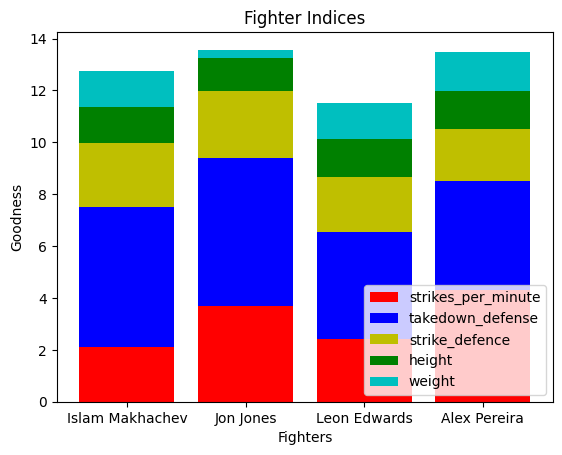

In [793]:
x = ['Islam Makhachev', 'Jon Jones', 'Leon Edwards', 'Alex Pereira']
y1 = np.array([2.12618841832325, 3.707865168539326, 2.420051858254105, 4.32152117545376])
y2 = np.array([5.4, 5.699999999999999, 4.14, 4.199999999999999])
y3 = np.array([2.44, 2.56, 2.12, 2.0])
y4 = np.array([1.3815789473684212, 1.2808988764044944, 1.4415584415584415, 1.4615384615384615])
y5 = np.array([1.3840551181102363, 0.3220717496492685, 1.3933863389953016, 1.5])

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='c')
plt.xlabel("Fighters")
plt.ylabel("Goodness")
plt.legend(["strikes_per_minute", "takedown_defense", "strike_defence", "height", "weight"], loc='lower right')
plt.title("Fighter Indices")
plt.show()